# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Import Data File

In [ ]:
df = pd.read_csv("C:/Users/Hp Hc070922/Downloads/Diwali Sales Data (1).csv", encoding="latin1")  # load CSV file into DataFrame with latin1 encoding


# Display First 5 Rows

In [6]:
df.head()  # display the first 5 rows of the DataFrame

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# Size Of Data

In [7]:
df.shape  # get the number of rows and columns in the DataFrame

(11251, 15)

# Information About Data

In [8]:
df.info()  # display summary of DataFrame including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# Data Cleaning

In [ ]:
df.drop(columns = ['Status','unnamed1'],inplace = True) # remove unnecessary columns

In [10]:
df.isna().sum() # count the number of missing values in each column

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [ ]:
df.dropna(inplace = True) # remove rows with missing values

In [ ]:
df['Amount'] = df['Amount'].astype(int)  # convert 'Amount' column to integers

In [13]:
df['Amount'].dtypes  # check data type of 'Amount' column

dtype('int32')

In [ ]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x : 'Yes' if x == 1 else 'No')  # convert 1/0 to Yes/No

# EDA

In [15]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,No,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,Yes,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,Yes,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,No,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,Yes,Gujarat,Western,Food Processing,Auto,2,23877


In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [17]:
df.describe()

,User_ID,Age,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,2.489634,9453.610553
std,1.716039e+03,12.753866,1.114967,5222.355168
min,1.000001e+06,12.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,4.000000,23952.000000


In [18]:
df.describe(include = object)

,Cust_name,Product_ID,Gender,Age Group,Marital_Status,State,Zone,Occupation,Product_Category
count,11239,11239,11239,11239,11239,11239,11239,11239,11239
unique,1250,2350,2,7,2,16,5,15,18
top,Vishakha,P00265242,F,26-35,No,Uttar Pradesh,Central,IT Sector,Clothing & Apparel
freq,42,53,7832,4541,6518,1944,4289,1583,2655


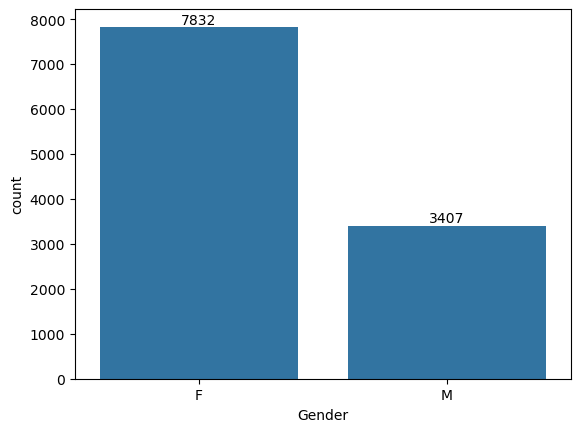

In [19]:
ax = sns.countplot(data = df , x ='Gender')  # create a count plot for 'Gender' column
for bars in ax.containers:
    ax.bar_label(bars) # add labels to each bar
plt.show() # display the plot

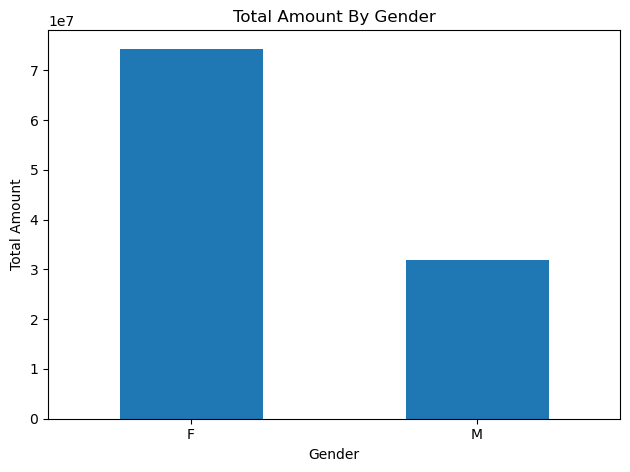

In [20]:
df.groupby('Gender')['Amount'].sum().sort_values(ascending = False).plot(kind = 'bar') # create a bar chart for total amount by gender
plt.title('Total Amount By Gender') # set plot title
plt.ylabel('Total Amount') # set y-axis label
plt.tight_layout() # adjust layout to avoid overlap
plt.xticks(rotation = 0) # set x-axis labels to horizontal
plt.show() # display the plot

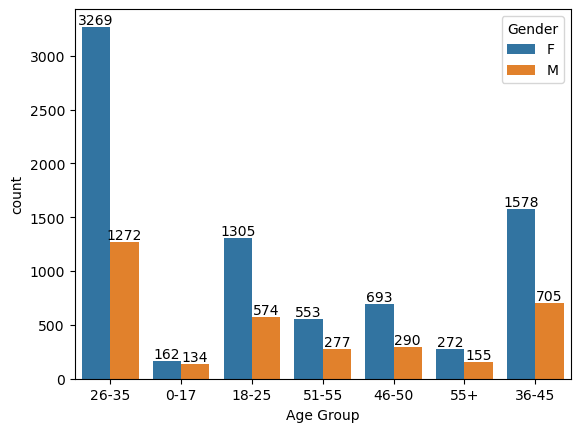

In [21]:
ax = sns.countplot(data = df , x ='Age Group' , hue = 'Gender')  # create a count plot for 'Age Group' with gender as hue
for bars in ax.containers:
    ax.bar_label(bars)  # add labels to each bar
plt.show()  # display the plot


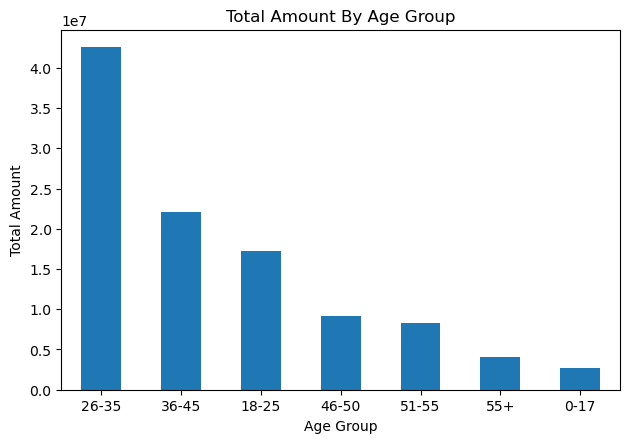

In [22]:
df.groupby('Age Group')['Amount'].sum().sort_values(ascending = False).plot(kind = 'bar') # bar chart of total amount by age group
plt.title('Total Amount By Age Group') # set plot title
plt.ylabel('Total Amount') # set y-axis label
plt.tight_layout() # adjust layout
plt.xticks(rotation = 0) # keep x-axis labels horizontal
plt.show() # display the plot

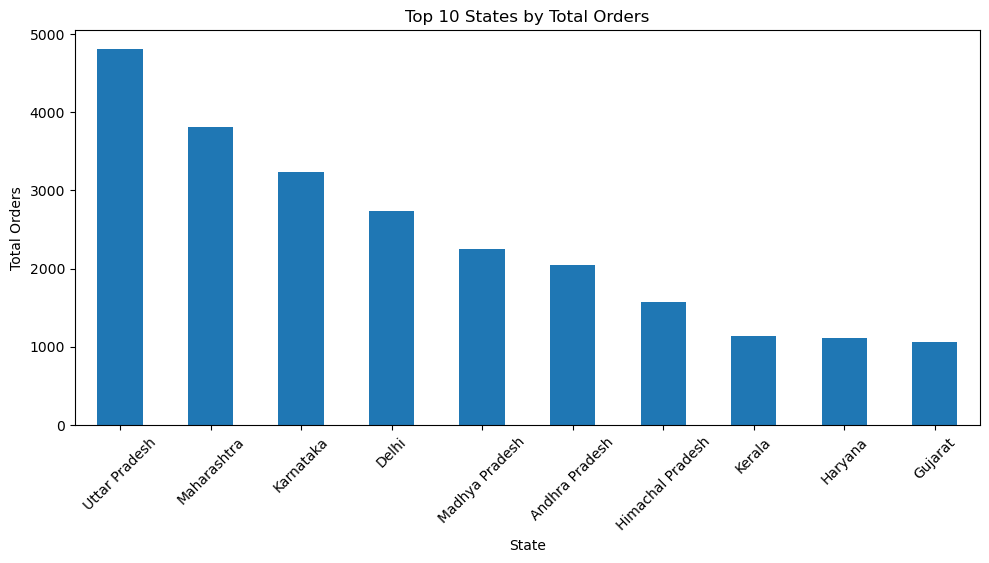

In [23]:
plt.figure(figsize=(10,6))  # set the figure size
df.groupby('State')['Orders'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar') # bar chart of top 10 states by total orders
plt.title('Top 10 States by Total Orders') # set plot title
plt.ylabel('Total Orders') # set y-axis label
plt.tight_layout() # adjust layout
plt.xticks(rotation = 45) # rotate x-axis labels for better readability
plt.show() # display the plot

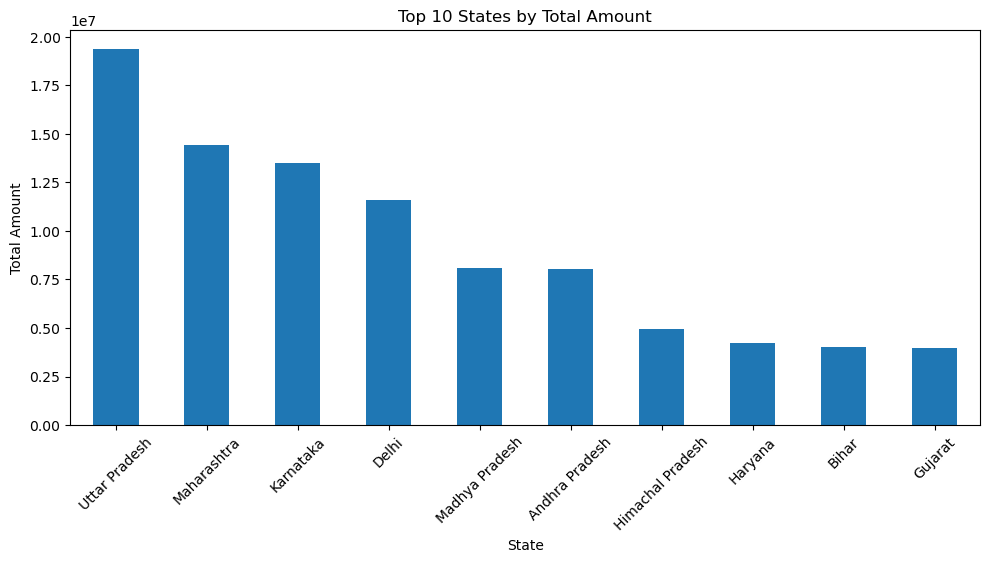

In [24]:
plt.figure(figsize=(10,6)) # set the figure size
df.groupby('State')['Amount'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar') # bar chart of top 10 states by total amount
plt.title('Top 10 States by Total Amount') # set plot title
plt.ylabel('Total Amount') # set y-axis label
plt.tight_layout() # adjust layout
plt.xticks(rotation = 45) # rotate x-axis labels for readability
plt.show() # display the plot

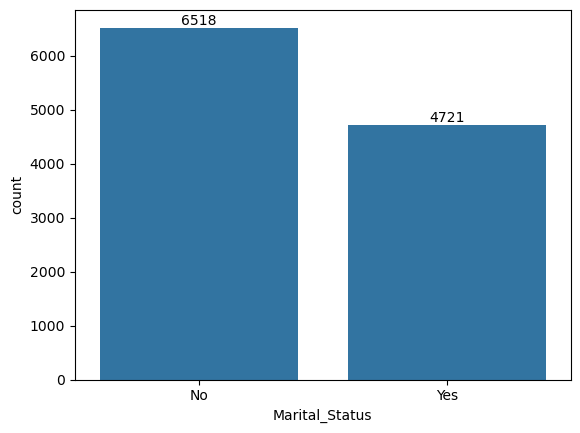

In [25]:

ax = sns.countplot(data = df , x = 'Marital_Status')  # create a count plot for marital status
for bars in ax.containers: 
    ax.bar_label(bars) # add labels to each bar
plt.show() # display the plot

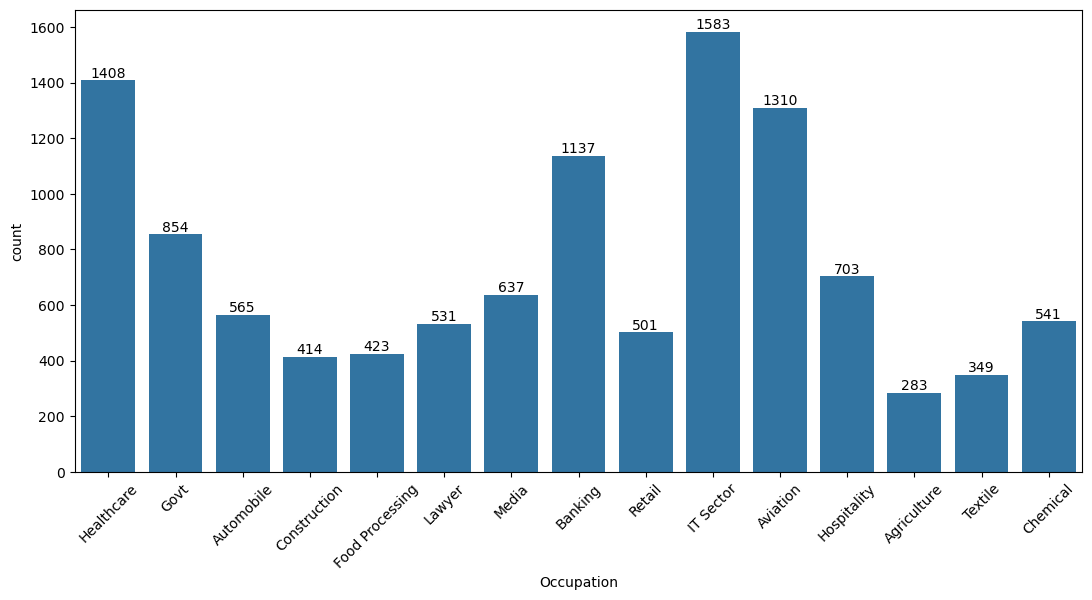

In [26]:
plt.figure(figsize=(13,6)) # set the figure size
plt.xticks(rotation  = 45) # rotate x-axis labels for better readability
ax = sns.countplot(data = df , x = 'Occupation') # create a count plot for occupation
for bars in ax.containers:
    ax.bar_label(bars) # add labels to each bar
plt.show() # display the plot

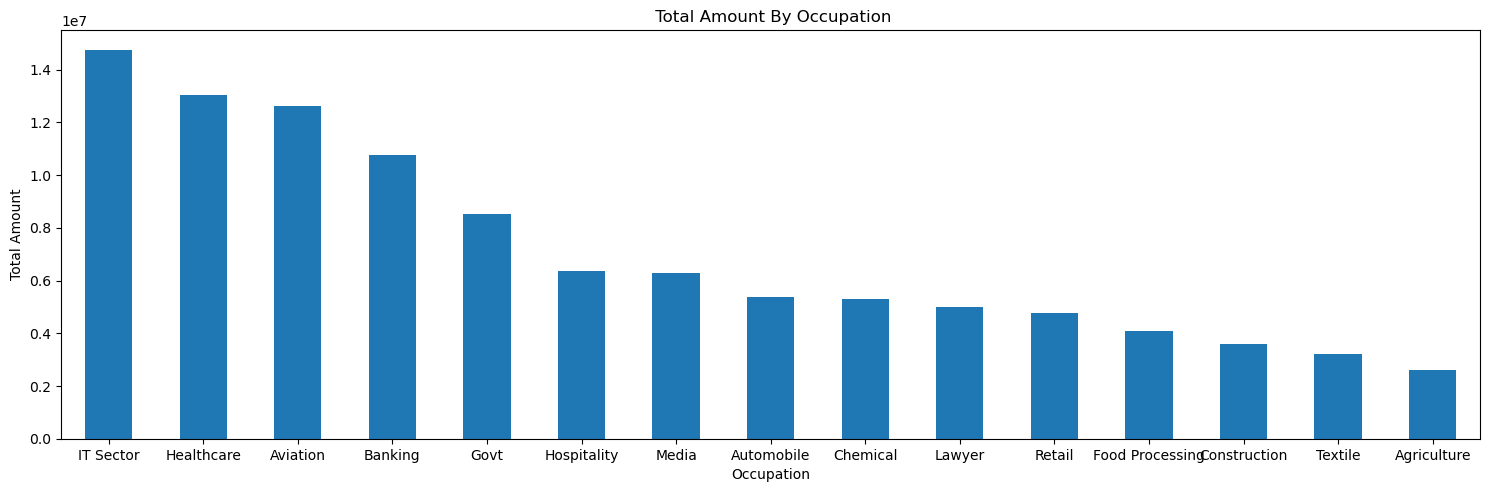

In [27]:
plt.figure(figsize=(15,6)) # set the figure size
df.groupby('Occupation')['Amount'].sum().sort_values(ascending = False).plot(kind = 'bar') # bar chart of total amount by occupation
plt.title(' Total Amount By Occupation')  # set plot title
plt.ylabel('Total Amount') # set y-axis label
plt.tight_layout() # adjust layout
plt.xticks(rotation = 0) # keep x-axis labels horizontal
plt.show()  # display the plot

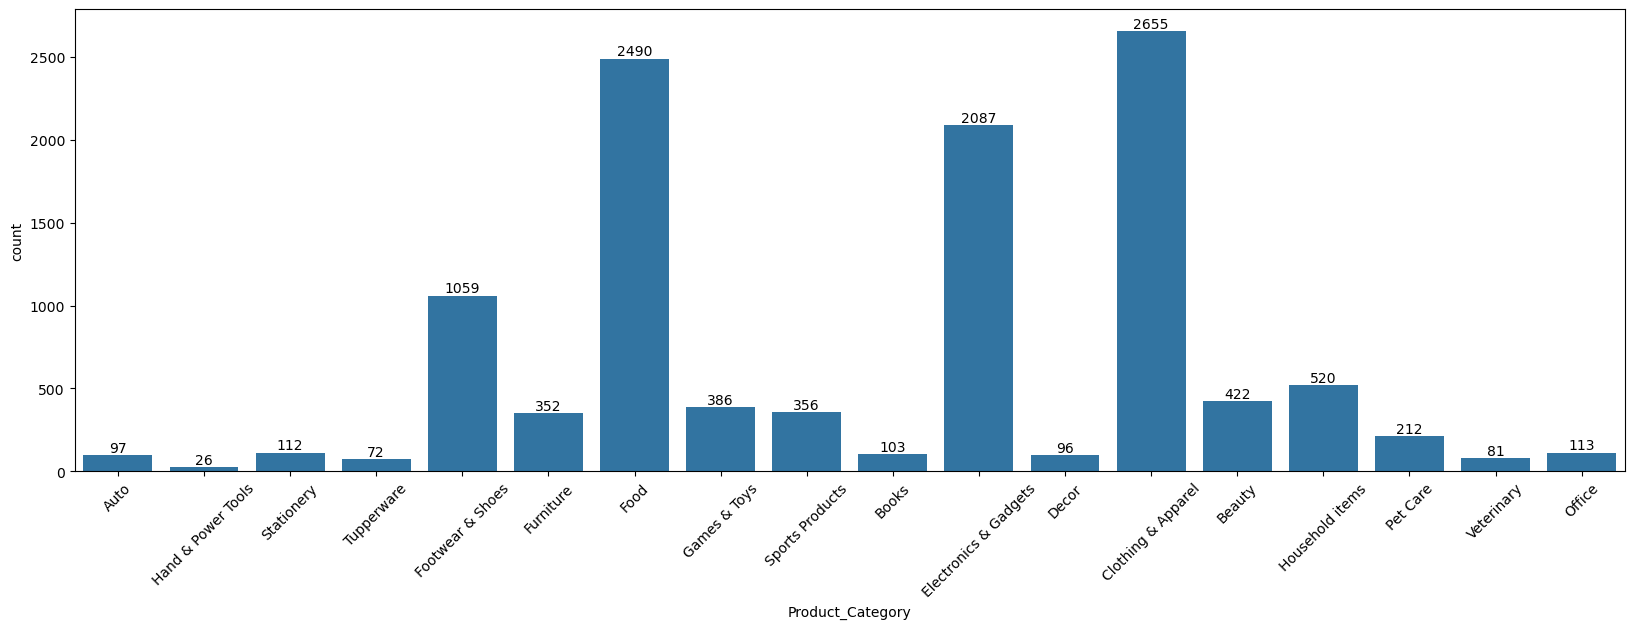

In [28]:
plt.figure(figsize=(20,6)) # set the figure size
plt.xticks(rotation  = 45) # rotate x-axis labels for better readability
ax = sns.countplot(data = df , x = 'Product_Category') # create a count plot for product categories
for bars in ax.containers:
    ax.bar_label(bars) # add labels to each bar
plt.show() # display the plot

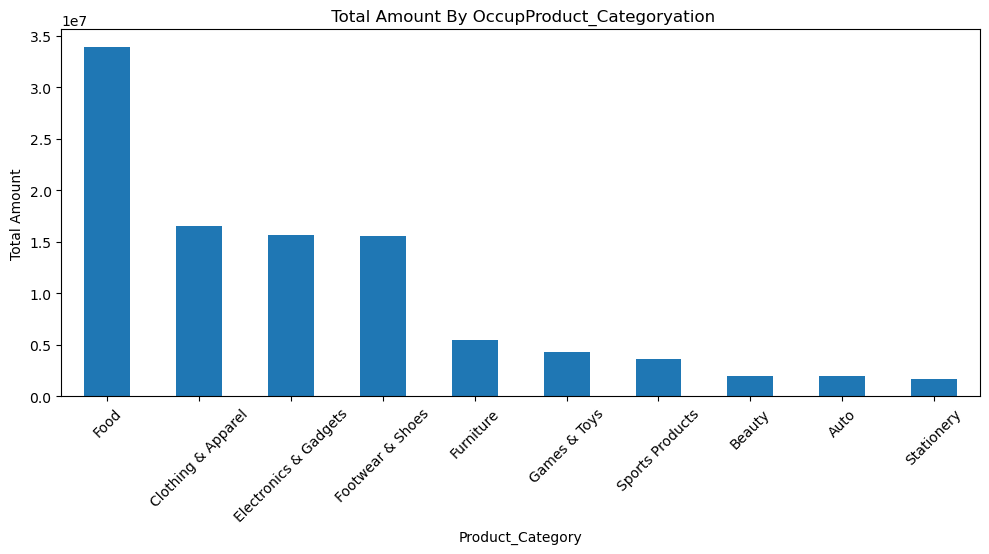

In [29]:
plt.figure(figsize=(10,6)) # set the figure size
df.groupby('Product_Category')['Amount'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar') # bar chart of top 10 product categories by total amount
plt.title(' Total Amount By OccupProduct_Categoryation') # set plot title
plt.ylabel('Total Amount') # set y-axis label
plt.tight_layout()   # adjust layout
plt.xticks(rotation = 45) # rotate x-axis labels for better readability
plt.show() # display the plot